In [1]:
from time_series_generator import TimeSeriesGenerator
from time_series_ddpm_model import TimeSeriesDDPM
import numpy as np
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
import torch

In [6]:
data=TimeSeriesGenerator.generate_ar_series(500, 1000, 1, 0.6,0.1)

In [7]:
series=data.numpy()

In [8]:
series.shape

(500, 1000, 1)

In [23]:
series

array([[[ 1.7256988 ],
        [ 1.0175881 ],
        [ 0.6006764 ],
        ...,
        [-0.15198678],
        [-0.15238886],
        [-0.12920216]],

       [[ 0.7515613 ],
        [ 0.4146905 ],
        [ 0.15582345],
        ...,
        [-0.03558858],
        [ 0.01055128],
        [ 0.1480812 ]],

       [[-0.4858277 ],
        [-0.41505435],
        [-0.10037914],
        ...,
        [ 0.05278467],
        [ 0.00445944],
        [-0.13308254]],

       ...,

       [[ 0.05602714],
        [ 0.02893111],
        [ 0.0988649 ],
        ...,
        [ 0.15622847],
        [ 0.19659364],
        [ 0.04840937]],

       [[ 1.0288144 ],
        [ 0.5282499 ],
        [ 0.4567814 ],
        ...,
        [ 0.07822607],
        [ 0.03124567],
        [ 0.01432324]],

       [[ 1.0460473 ],
        [ 0.59875524],
        [ 0.45604542],
        ...,
        [ 0.12123924],
        [ 0.1634879 ],
        [ 0.23054773]]], shape=(10, 1000, 1), dtype=float32)

In [10]:
tsmodel=ar_model.AutoReg(series[1], 1, trend='n')

In [11]:
result=tsmodel.fit()

In [13]:
series[0].shape

(1000, 1)

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood                 892.393
Method:               Conditional MLE   S.D. of innovations              0.099
Date:                Wed, 26 Mar 2025   AIC                          -1780.785
Time:                        12:06:32   BIC                          -1770.972
Sample:                             1   HQIC                         -1777.055
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.5674      0.026     21.771      0.000       0.516       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7624           +0.0000j            1.7624            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
result.params[0]

np.float64(0.567411217891354)

In [16]:
def phi_parameter_estimation(series):
    """This function takes an array of AR1 time series as an argument
    and returns  a list of the phi1 estimated parameter for each series"""
    params_list=[]
    for serie in series:
        tsmodel=ar_model.AutoReg(serie, 1, trend='n')
        result=tsmodel.fit()
        params_list.append(result.params[0])
    return params_list

In [21]:
params=phi_parameter_estimation(series)

In [22]:
params

[np.float64(0.6226219806989584),
 np.float64(0.567411217891354),
 np.float64(0.5942951821884546),
 np.float64(0.6475982545937183),
 np.float64(0.591962544762274),
 np.float64(0.550391265292923),
 np.float64(0.5794221764504673),
 np.float64(0.537185618586968),
 np.float64(0.5669837680579707),
 np.float64(0.5527889493158179),
 np.float64(0.611438235349226),
 np.float64(0.5800179177615963),
 np.float64(0.6124608263956415),
 np.float64(0.5957694754437342),
 np.float64(0.5671081669149904),
 np.float64(0.571154211919864),
 np.float64(0.6216932440911538),
 np.float64(0.6062054429849918),
 np.float64(0.5936775556473982),
 np.float64(0.5983118467767398),
 np.float64(0.6239214858459968),
 np.float64(0.618763556502117),
 np.float64(0.5842149458008354),
 np.float64(0.585560544990606),
 np.float64(0.6242715796158238),
 np.float64(0.5761012563470708),
 np.float64(0.567535454304035),
 np.float64(0.6059423735062373),
 np.float64(0.6056221357040865),
 np.float64(0.5662766769749866),
 np.float64(0.58776

(array([  1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   4.,
          0.,   2.,   3.,   4.,   2.,   1.,   8.,  11.,  10.,   9.,  13.,
         20.,  20.,  24.,  28.,  24.,  41.,  42.,  39.,  54.,  48.,  65.,
         77.,  91., 108., 108., 126., 128., 138., 155., 163., 176., 203.,
        238., 240., 246., 275., 266., 287., 272., 282., 290., 266., 318.,
        328., 317., 271., 305., 284., 280., 285., 277., 268., 237., 245.,
        221., 194., 171., 191., 164., 143., 116., 103., 106.,  81.,  84.,
         79.,  54.,  54.,  37.,  27.,  27.,  29.,  16.,  16.,  10.,   9.,
          8.,  13.,   5.,   4.,   3.,   3.,   2.,   0.,   1.,   0.,   0.,
          1.]),
 array([0.49642296, 0.49829205, 0.50016114, 0.50203024, 0.50389933,
        0.50576842, 0.50763751, 0.5095066 , 0.51137569, 0.51324478,
        0.51511387, 0.51698297, 0.51885206, 0.52072115, 0.52259024,
        0.52445933, 0.52632842, 0.52819751, 0.53006661, 0.5319357 ,
        0.53380479, 0.53567388, 0.53754297, 0.

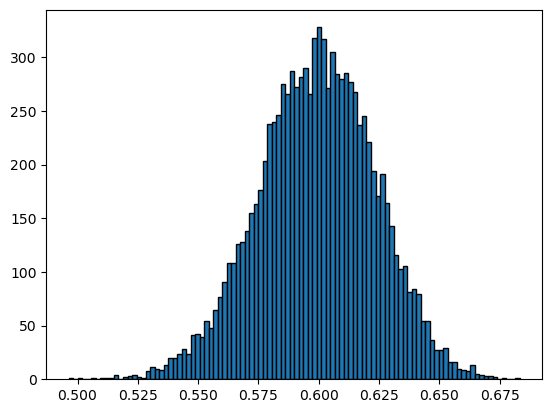

In [41]:
plt.hist(params, bins=100, edgecolor='black')

In [24]:
model=TimeSeriesDDPM(input_dim=1, hidden_dim=32, T=1000)

In [9]:
model.train_model(data, num_epochs=100, plot=False)

Epoch 1, Loss: 0.9949336320161819
Epoch 2, Loss: 0.8878648728132248
Epoch 3, Loss: 0.5155188371241093
Epoch 4, Loss: 0.204253688454628
Epoch 5, Loss: 0.10626035490073264
Epoch 6, Loss: 0.06911480544134975
Epoch 7, Loss: 0.06417434218339622
Epoch 8, Loss: 0.0523695465689525
Epoch 9, Loss: 0.04428673127433285
Epoch 10, Loss: 0.043178350089583546
Epoch 11, Loss: 0.06543815112207085
Epoch 12, Loss: 0.04320239159045741
Epoch 13, Loss: 0.04578388049500063
Epoch 14, Loss: 0.05165654579875991
Epoch 15, Loss: 0.04967630217550322
Epoch 16, Loss: 0.06382850927766412
Epoch 17, Loss: 0.05129505768883973
Epoch 18, Loss: 0.049872198589146134
Epoch 19, Loss: 0.05516185297165066
Epoch 20, Loss: 0.05065785572864115
Epoch 21, Loss: 0.05262085948139429
Epoch 22, Loss: 0.0826823565736413
Epoch 23, Loss: 0.06367175063118338
Epoch 24, Loss: 0.046253850092180075
Epoch 25, Loss: 0.04484165831003338
Epoch 26, Loss: 0.05965437323553488
Epoch 27, Loss: 0.04983523105271161
Epoch 28, Loss: 0.04455931963166222
Epoch

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generated_series=model.sample(seq_length=100, device=device, num_samples=50)

In [38]:
generated_series.shape

(50, 100, 1)

In [44]:
def parameter_estimation2(series):
    params_list=[]
    for serie in np.rollaxis(series, 1):
        tsmodel=ar_model.AutoReg(serie, 1, trend='n')
        result=tsmodel.fit()
        params_list.append(result.params[0])
    return params_list

In [42]:
simulated_params=parameter_estimation2(generated_series)

(array([ 1.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,
         0.,  3.,  3.,  6.,  3.,  4.,  6., 10., 11., 18., 23., 39., 33.,
        55., 57., 61., 67., 66., 77., 65., 67., 58., 55., 45., 28., 28.,
        20., 20.,  9., 11.,  7.,  4.,  4.,  4.,  5.,  2.,  2.,  3.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.91431886e-05, 6.12486187e-03, 1.22005805e-02, 1.82762992e-02,
        2.43520179e-02, 3.04277366e-02, 3.65034553e-02, 4.25791739e-02,
        4.86548926e-02, 5.47306113e-02, 6.08063300e-02, 6.68820486e-02,
        7.29577673e-02, 7.90334860e-02, 8.51092047e-02, 9.11849234e-02,
        9.72606420e-02, 1.03336361e-01, 1.09412079e-01, 1.15487798e-01,
        1.21563517e-01, 1.27639235e-01, 1.33714954e-01, 1.39790673e-01,
  

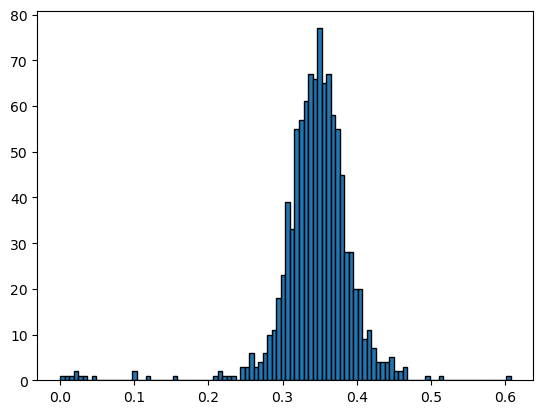

In [43]:
plt.hist(simulated_params, bins=100, edgecolor='black')

## Chequar tema de las dimensiones para las series generadas por la red neuronal, algo tiene pinta de estar mal pero no estoy seguro